# Interaction with IMOS mooring data on the AODN s3 bucket

Tutorial notebook showing how to:

 - Inspect the AODN s3 bucket on cloudstor (list directories and folders)
 - Open individual netcdf files using the Python [xarray](http://xarray.pydata.org/en/stable/) module.
 - Plot time-series data
 - Download and save ADCP velocity data
 
---

Matt Rayson

University of Western Australia

October 2020

In [1]:
# Install modules here (need to restart the notebook after running this cell)
# !pip install --user h5netcdf xarray s3fs 

In [29]:
import dask
dask.config.set(scheduler='processes')


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from s3fs import S3FileSystem, S3Map


Bad key "backend.qt5" on line 5 in
/home/mrayson/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Access the AODN s3 bucket like this
fs = S3FileSystem(anon=True)
aodn = fs.ls('imos-data')
for item in aodn:
    print(item)


imos-data/Bureau_of_Meteorology
imos-data/CSIRO
imos-data/Deakin_University
imos-data/Defence_Technology_Agency-New_Zealand
imos-data/Department_of_Defence
imos-data/Department_of_Environment_and_Science-Queensland
imos-data/Department_of_Transport-Western_Australia
imos-data/Derwent_Estuary_Program
imos-data/Future_Reef_MAP
imos-data/IMOS
imos-data/Macquarie_University
imos-data/NSW-OEH
imos-data/TERN
imos-data/UNSW
imos-data/UWA
imos-data/WAMSI
imos-data/error.html
imos-data/index.html
imos-data/robots.txt


In [6]:
print('####')
aodn = fs.ls('imos-data/IMOS')
for item in aodn:
    print(item)
    
print('####')
aodn = fs.ls('imos-data/IMOS/ANMN')
for item in aodn:
    print(item)
    
print('####')
aodn = fs.ls('imos-data/IMOS/ANMN/QLD/ITFTIS')
for item in aodn:
    print(item)

####
imos-data/IMOS/AATAMS
imos-data/IMOS/ABOS
imos-data/IMOS/ACORN
imos-data/IMOS/ACORN_JCU_historical
imos-data/IMOS/ANFOG
imos-data/IMOS/ANMN
imos-data/IMOS/AUV
imos-data/IMOS/Argo
imos-data/IMOS/DWM
imos-data/IMOS/FAIMMS
imos-data/IMOS/OceanCurrent
imos-data/IMOS/SAIMOS
imos-data/IMOS/SOOP
imos-data/IMOS/SRS
imos-data/IMOS/eMII
####
imos-data/IMOS/ANMN/AM
imos-data/IMOS/ANMN/Acoustic
imos-data/IMOS/ANMN/NRS
imos-data/IMOS/ANMN/NSW
imos-data/IMOS/ANMN/PA
imos-data/IMOS/ANMN/QLD
imos-data/IMOS/ANMN/SA
imos-data/IMOS/ANMN/WA
####
imos-data/IMOS/ANMN/QLD/ITFTIS/CTD_timeseries
imos-data/IMOS/ANMN/QLD/ITFTIS/Temperature
imos-data/IMOS/ANMN/QLD/ITFTIS/Velocity
imos-data/IMOS/ANMN/QLD/ITFTIS/aggregated_timeseries
imos-data/IMOS/ANMN/QLD/ITFTIS/hourly_timeseries
imos-data/IMOS/ANMN/QLD/ITFTIS/plots


In [13]:
sitename = 'ITFTIS'
dirnames = ['Velocity']
timestr = '201702'
print('####')
adcpfiles = []
for fpath in dirnames:
    aodn = fs.glob('imos-data/IMOS/ANMN/QLD/{}/{}/*_{}*.nc'.format(sitename, fpath, timestr))
    for item in aodn:
        print(item)
        adcpfiles.append(item)

####
imos-data/IMOS/ANMN/QLD/ITFTIS/Velocity/IMOS_ANMN-QLD_AETVZ_20170207T075900Z_ITFTIS_FV01_ITFTIS-1702-Long-Ranger-Workhorse-ADCP-454.6_END-20170720T081900Z_C-20180430T014529Z.nc


In [14]:
# Open a file with xarray
filename = adcpfiles[0]
print(filename)

fileobj = fs.open(filename)
ds = xr.open_dataset(fileobj)
ds

imos-data/IMOS/ANMN/QLD/ITFTIS/Velocity/IMOS_ANMN-QLD_AETVZ_20170207T075900Z_ITFTIS_FV01_ITFTIS-1702-Long-Ranger-Workhorse-ADCP-454.6_END-20170720T081900Z_C-20180430T014529Z.nc


<xarray.Dataset>
Dimensions:                   (HEIGHT_ABOVE_SENSOR: 33, TIME: 11738)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2017-02-07T07:58:59.99999...
  * HEIGHT_ABOVE_SENSOR       (HEIGHT_ABOVE_SENSOR) float32 23.17 ... 503.17
    LATITUDE                  float64 ...
    LONGITUDE                 float64 ...
    NOMINAL_DEPTH             float32 ...
Data variables:
    TIMESERIES                int32 ...
    VCUR                      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    VCUR_quality_control      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    UCUR                      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    UCUR_quality_control      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    WCUR                      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    WCUR_quality_control      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CSPD                      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CSPD_quality_control      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CDIR                      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CDIR_quality_control      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ECUR                      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ECUR_quality_control      (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC1                    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC1_quality_control    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC2                    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC2_quality_control    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC3                    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC3_quality_control    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC4                    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSIC4_quality_control    (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG1                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG1_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG2                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG2_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG3                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG3_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG4                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    CMAG4_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG1                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG1_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG2                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG2_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG3                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG3_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG4                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    PERG4_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    TEMP                      (TIME) float32 ...
    TEMP_quality_control      (TIME) float32 ...
    PRES_REL                  (TIME) float32 ...
    PRES_REL_quality_control  (TIME) float32 ...
    PITCH                     (TIME) float32 ...
    PITCH_quality_control     (TIME) float32 ...
    ROLL                      (TIME) float32 ...
    ROLL_quality_control      (TIME) float32 ...
    HEADING                   (TIME) float32 ...
    HEADING_quality_control   (TIME) float32 ...
    VOLT                      (TIME) float32 ...
    VOLT_quality_control      (TIME) float32 ...
    DEPTH                     (TIME) float32 ...
    DEPTH_quality_control     (TIME) float32 ...
    ABSI1                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI1_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI2                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI2_quality_control     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI3                     (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    A

In [15]:
ds.NOMINAL_DEPTH.values, ds.LATITUDE.values, ds.LONGITUDE.values

(array(454.6, dtype=float32), array(-9.81221667), array(127.56335))

/home/mrayson/group/mrayson/miniconda3/envs/soda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


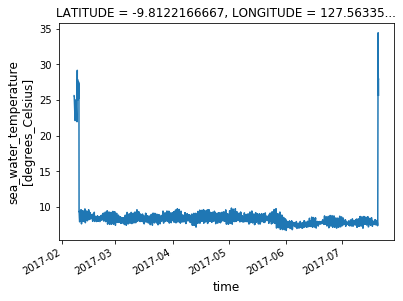

In [16]:
# Plot the water temperature data
plt.figure()
ds['TEMP'].plot()

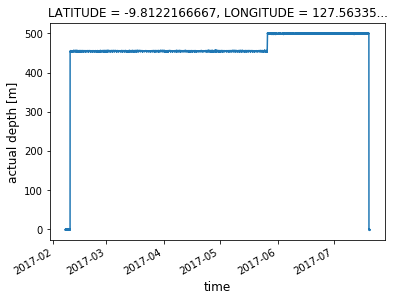

In [17]:
# Plot the pressure data
plt.figure()
ds['DEPTH'].plot()

In [18]:
ds['TEMP_quality_control'].values 

array([4., 4., 4., ..., 4., 4., 4.], dtype=float32)

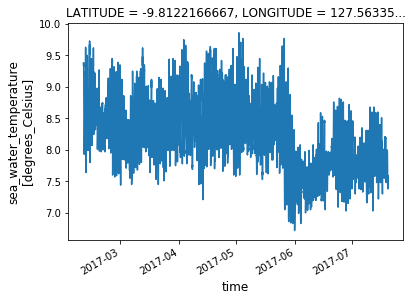

In [19]:
# Plot the quality controlled water temperature data

badidx = ds['TEMP_quality_control'].values != 1
temp = ds['TEMP']
temp[badidx] = np.nan

plt.figure()
temp.plot()

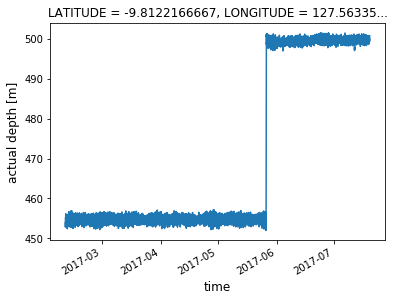

In [20]:
# Plot the quality controlled depth data

badidx = ds['DEPTH_quality_control'].values !=1
temp = ds['DEPTH']
temp[badidx] = np.nan

plt.figure()
temp.plot()


In [32]:
# Function that combines the steps above to return a QC'd variable as a DataArray object
def get_uv_qc_aodn(filename,varname):
    fileobj = fs.open(filename)
    ds = xr.open_dataset(fileobj)
    badidx = ds['{}_quality_control'.format(varname)].values !=1
    temp = ds['{}'.format(varname)]
    temp.values[badidx] = np.nan
    return temp

In [35]:
U = get_uv_qc_aodn(filename, 'UCUR')
V = get_uv_qc_aodn(filename, 'VCUR')
P = get_uv_qc_aodn(filename, 'DEPTH')


dsout = xr.Dataset({'u':U, 'v':V,'pressure':P})
dsout

<xarray.Dataset>
Dimensions:              (HEIGHT_ABOVE_SENSOR: 33, TIME: 11738)
Coordinates:
  * TIME                 (TIME) datetime64[ns] 2017-02-07T07:58:59.999996928 ...
  * HEIGHT_ABOVE_SENSOR  (HEIGHT_ABOVE_SENSOR) float32 23.17 38.17 ... 503.17
    LATITUDE             float64 -9.812
    LONGITUDE            float64 127.6
    NOMINAL_DEPTH        float32 454.6
Data variables:
    u                    (TIME, HEIGHT_ABOVE_SENSOR) float32 nan nan ... nan nan
    v                    (TIME, HEIGHT_ABOVE_SENSOR) float32 nan nan ... nan nan
    pressure             (TIME) float32 nan nan nan nan nan ... nan nan nan nan

In [36]:
outfile = '../DATA/IMOS_Stack_Mooring_ITFTIS_201702_UV.nc'
dsout.to_netcdf(outfile)
print('Done - ',outfile)

Done -  ../DATA/IMOS_Stack_Mooring_ITFTIS_201702_UV.nc
